# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")
print("Initial Dataset:")
print(df.dtypes)

Initial Dataset:
transact                       int64
onServiceConnected             int64
bindService                    int64
attachInterface                int64
ServiceConnection              int64
                               ...  
ACCESS_FINE_LOCATION           int64
SET_WALLPAPER_HINTS            int64
SET_PREFERRED_APPLICATIONS     int64
WRITE_SECURE_SETTINGS          int64
class                         object
Length: 216, dtype: object


<ipython-input-13-41d4614bed46>:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/dataset.csv")


In [16]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv", dtype={92: str})


In [19]:
X = df.drop('class', axis=1)
y = df['class']

In [21]:
print(df['class'].unique())
print(df.dtypes)


['S' 'B']
transact                       int64
onServiceConnected             int64
bindService                    int64
attachInterface                int64
ServiceConnection              int64
                               ...  
ACCESS_FINE_LOCATION           int64
SET_WALLPAPER_HINTS            int64
SET_PREFERRED_APPLICATIONS     int64
WRITE_SECURE_SETTINGS          int64
class                         object
Length: 216, dtype: object


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def create_pipeline(model):
    return make_pipeline(StandardScaler(), model)


In [25]:
import numpy as np

# Step 1: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Step 2: Check how many NaNs are in each column
print(df.isnull().sum())


transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64


In [26]:
df = df.dropna(axis=1, thresh=0.8*len(df))

In [27]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object'):
    if col != 'class':  # skip target column
        df[col] = LabelEncoder().fit_transform(df[col])


In [29]:
X = df.drop('class', axis=1)
y = df['class']

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),  # Optional: Add any preprocessing steps
        ('model', model)  # Ensure this step is named 'model'
    ])


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    'Random Forest': create_pipeline(RandomForestClassifier(random_state=42, n_estimators=100)),
    'Logistic Regression': create_pipeline(LogisticRegression(random_state=42, max_iter=1000)),
    'SVM': create_pipeline(SVC(random_state=42, probability=True)),
    'KNN': create_pipeline(KNeighborsClassifier(n_neighbors=5))
}

# Train & evaluate
results = {}
cv_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()


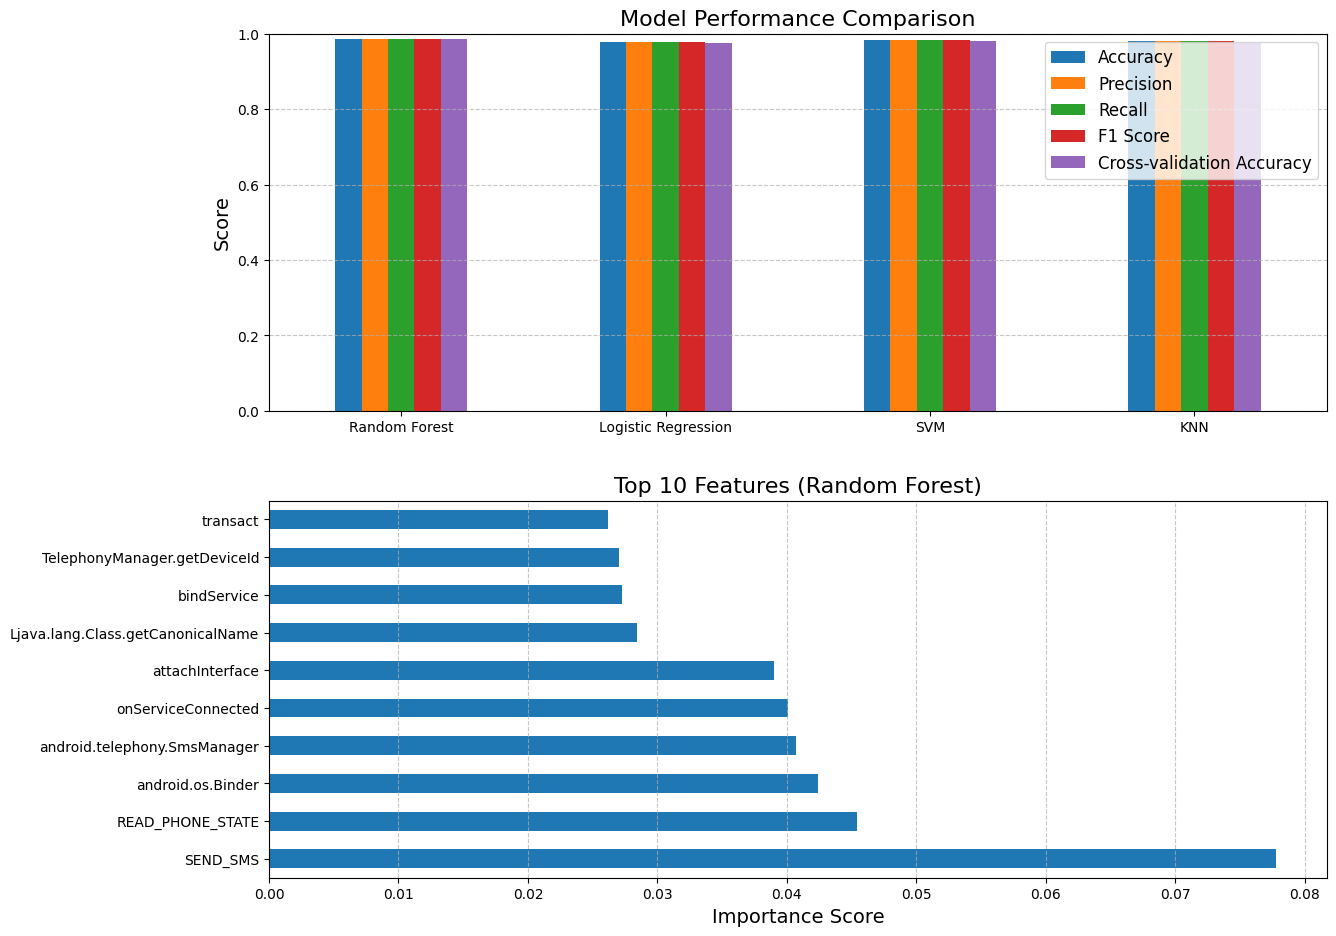

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

<Figure size 800x600 with 0 Axes>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming create_pipeline is defined as follows:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def create_pipeline(model):
    return Pipeline([
        ('scaler', StandardScaler()),  # Optional: Add any preprocessing steps
        ('model', model)  # Ensure this step is named 'model'
    ])

# Define models
models = {
    'Random Forest': create_pipeline(RandomForestClassifier(random_state=42, n_estimators=100)),
    'Logistic Regression': create_pipeline(LogisticRegression(random_state=42, max_iter=1000)),
    'SVM': create_pipeline(SVC(random_state=42, probability=True)),
    'KNN': create_pipeline(KNeighborsClassifier(n_neighbors=5))
}

# Train & evaluate
results = {}
cv_results = {}

# Assuming X_train, X_test, y_train, y_test are already defined
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

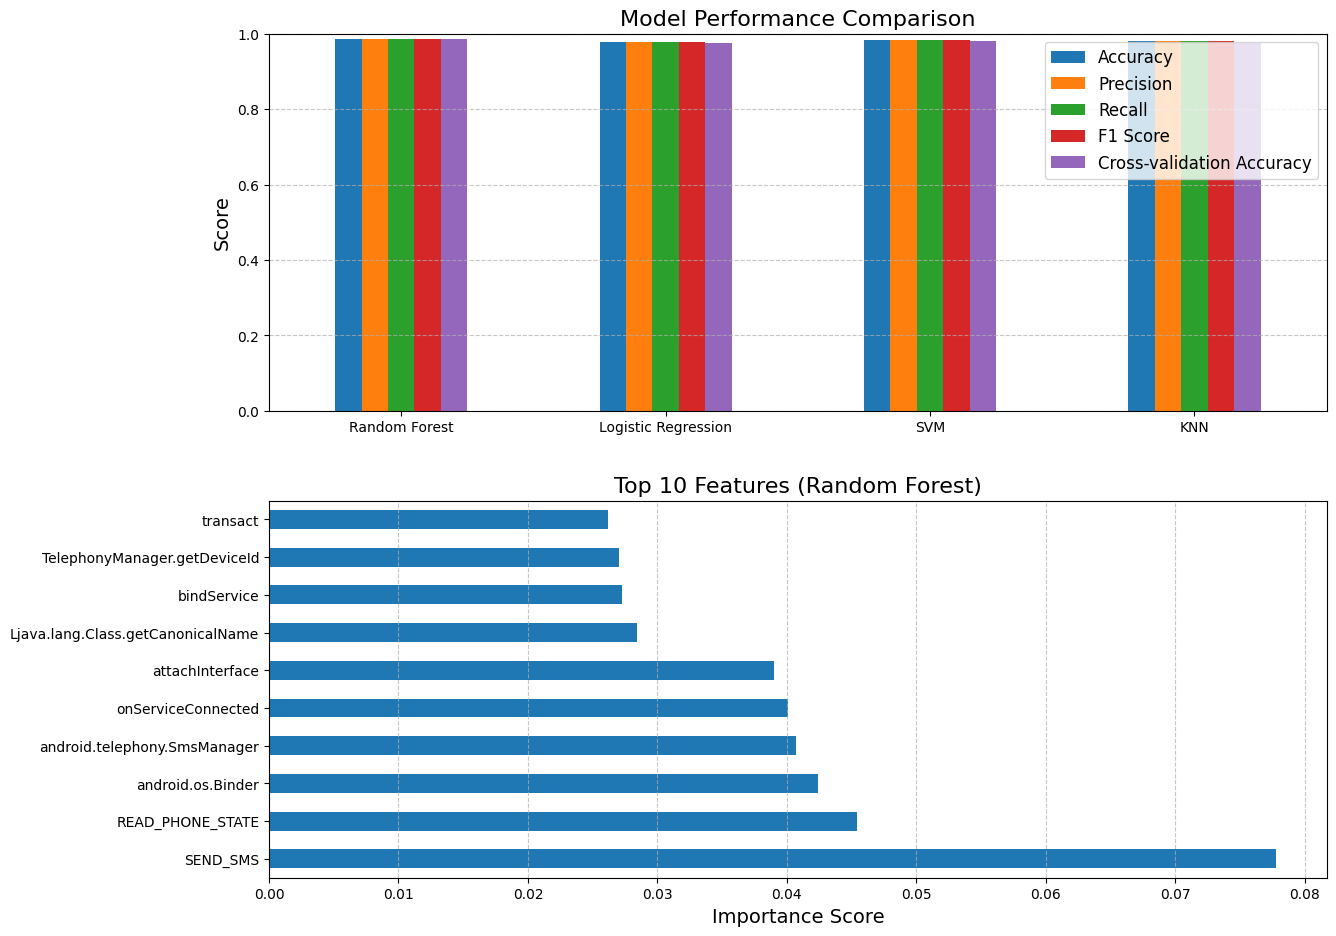

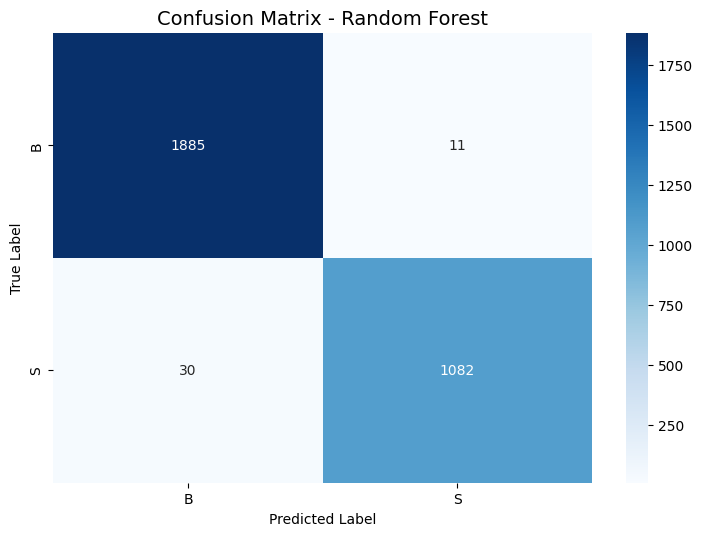


Detailed Model Performance:

Random Forest:
  Accuracy: 0.9864
  Precision: 0.9864
  Recall: 0.9864
  F1 Score: 0.9863
  Cross-validation Accuracy: 0.9864

Logistic Regression:
  Accuracy: 0.9784
  Precision: 0.9784
  Recall: 0.9784
  F1 Score: 0.9784
  Cross-validation Accuracy: 0.9755

SVM:
  Accuracy: 0.9830
  Precision: 0.9831
  Recall: 0.9830
  F1 Score: 0.9830
  Cross-validation Accuracy: 0.9795

KNN:
  Accuracy: 0.9817
  Precision: 0.9817
  Recall: 0.9817
  F1 Score: 0.9817
  Cross-validation Accuracy: 0.9752

✅ Best Performing Model: Random Forest


In [40]:
# Step 1: Create metrics DataFrame
metrics_df = pd.DataFrame(results).T
metrics_df['Cross-validation Accuracy'] = pd.Series(cv_results)

# Step 2: Bar Chart - All Model Metrics
plt.figure(figsize=(14, 10))
ax1 = plt.subplot(2, 1, 1)
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cross-validation Accuracy']].plot(kind='bar', ax=ax1, rot=0)
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Step 3: Feature Importance - Handle Different Models
ax2 = plt.subplot(2, 1, 2)
model_name = 'Random Forest'

# Access the 'model' step in the pipeline
rf_model = models[model_name].named_steps['model']

if isinstance(rf_model, RandomForestClassifier):
    # Random Forest has feature_importances_
    feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
elif hasattr(rf_model, 'coef_'):
    # For models like Logistic Regression or SVM, use coef_ for feature importance
    feature_importance = pd.Series(rf_model.coef_.flatten(), index=X.columns)
else:
    # Default if no feature_importances_ or coef_ is found
    feature_importance = pd.Series([0] * len(X.columns), index=X.columns)

top_features = feature_importance.sort_values(ascending=False)[:10]
top_features.plot(kind='barh', ax=ax2)
plt.title(f'Top 10 Features ({model_name})', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(pad=3)
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 4: Confusion Matrix - Best Model
best_model_name = metrics_df['Accuracy'].idxmax()
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)

# Use the unique values of y_test directly for labels
xticklabels = yticks = sorted(list(set(y_test)))  # Ensure sorted classes are used

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=xticklabels, yticklabels=yticks)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout(pad=3)
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Print Detailed Results
print("\nDetailed Model Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print(f"  Cross-validation Accuracy: {cv_results[name]:.4f}")

print("\n✅ Best Performing Model:", best_model_name)


**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.